# Simulation and Analysis of Game of Life

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import copy

In [2]:
# Define Tableau 10 Colors
tableau_colors = [
    (31, 119, 180),  # Blue
    (255, 127, 14),  # Orange
    (44, 160, 44),   # Green
    (214, 39, 40),   # Red
    (148, 103, 189), # Purple
    (140, 86, 75),   # Brown
    (227, 119, 194), # Pink
    (127, 127, 127), # Gray
    (188, 189, 34),  # Yellow
    (23, 190, 207),  # Cyan
]

# Normalize RGB values to range [0, 1]
tableau_colors = [(r / 255, g / 255, b / 255) for r, g, b in tableau_colors]

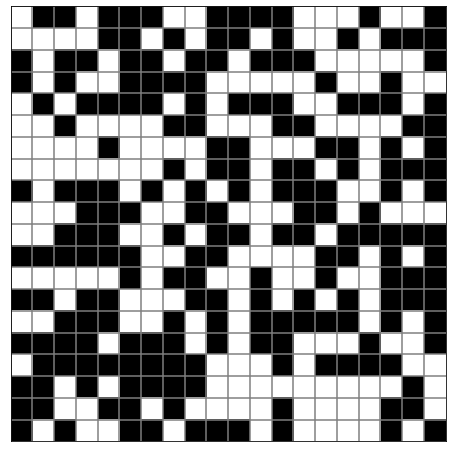

In [42]:
# Initial state library
size = 20
empty_grid = np.zeros((size, size))
init_loc = size // 2

bee_hive = copy.deepcopy(empty_grid)
bee_hive[init_loc,   init_loc]   = 1
bee_hive[init_loc,   init_loc+1] = 1
bee_hive[init_loc+1, init_loc-1] = 1
bee_hive[init_loc+1, init_loc+2] = 1
bee_hive[init_loc+2, init_loc]   = 1
bee_hive[init_loc+2, init_loc+1] = 1

toad = copy.deepcopy(empty_grid)
toad[init_loc+1, init_loc]   = 1
toad[init_loc+1, init_loc+1] = 1
toad[init_loc+1, init_loc+2] = 1
toad[init_loc+2, init_loc-1] = 1
toad[init_loc+2, init_loc]   = 1
toad[init_loc+2, init_loc+1] = 1

t_tetromino = copy.deepcopy(empty_grid)
t_tetromino[init_loc+1, init_loc+1] = 1
t_tetromino[init_loc+2, init_loc]   = 1
t_tetromino[init_loc+2, init_loc+1] = 1
t_tetromino[init_loc+2, init_loc+2] = 1

glider = copy.deepcopy(empty_grid)
glider[init_loc,   init_loc]   = 1
glider[init_loc,   init_loc+1] = 1
glider[init_loc,   init_loc+2] = 1
glider[init_loc+1, init_loc]   = 1
glider[init_loc+2, init_loc+1] = 1

# Function to initialize the grid with random values
def random_grid(size, filling_factor=0.5):
    return np.random.choice([0, 1], size * size, p=[1-filling_factor, filling_factor]).reshape(size, size)

# Function to update the grid according to Conway's rules
def update_grid(grid):
    new_grid = grid.copy()
    size = grid.shape[0]
    
    for i in range(size):
        for j in range(size):
            left, right  = j - 1, j + 1
            top, bottom  = i - 1, i + 1
#             make the board infinite
            if i == 0:
                top = size - 1
            if i == size - 1:
                bottom = 0
            if j == 0:
                left = size - 1
            if j == size - 1:
                right = 0
            
            # Count the number of alive neighbors
            neighbors = [grid[top, left], grid[top, j], grid[top, right], \
                         grid[i, left], grid[i, right],\
                         grid[bottom, left], grid[bottom, j], grid[bottom, right]]
            num_alive = np.sum(neighbors)
            
            # Apply Conway's rules
            if grid[i, j] == 1:
                if num_alive < 2 or num_alive > 3:
                    new_grid[i, j] = 0
            else:
                if num_alive == 3:
                    new_grid[i, j] = 1

    return new_grid

# Function to update the animation
def update(frameNum, img, grid, size):
    new_grid = update_grid(grid)
    img.set_data(new_grid)
    grid[:] = new_grid
    return img

# Set the grid size and create the initial grid
grid = random_grid(size, filling_factor=0.5)
# grid = copy.deepcopy(bee_hive)
# grid = copy.deepcopy(toad)
# grid = copy.deepcopy(t_tetromino)
# grid = copy.deepcopy(glider)
# print(grid)

# Create the figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 8))
img = ax.imshow(grid, interpolation='none', cmap='binary')

# Hide tick labels and tick marks on the X-axis
ax.set_xticks([])
ax.set_yticks([])
for i in range(size):
    ax.axvline(x=i-0.5, color=tableau_colors[7], linestyle='-')
    ax.axhline(y=i-0.5, color=tableau_colors[7], linestyle='-')
plt.gcf().set_facecolor('white')

# Create an animation
# ani = animation.FuncAnimation(fig, update, fargs=(img, grid, size),
#                               frames=3000, interval=100, save_count=100)

# Save the animation to a GIF file
# ani.save('./animations/random.gif', writer='pillow', fps=10)

plt.savefig('./animations/example.png')
plt.show()


# Display the animation in the Jupyter Notebook
# HTML(ani.to_jshtml())

## Analysis - filling factor vs. stability

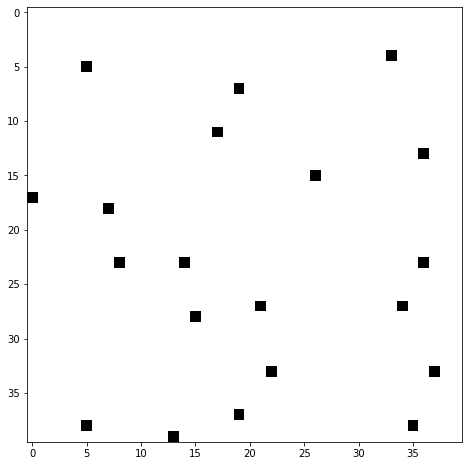

2
2
2
2
2
2
2
2
2
2


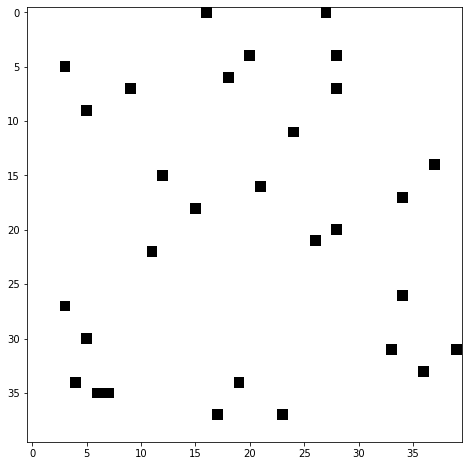

2
3
3
2
3
2
3
2
3
3


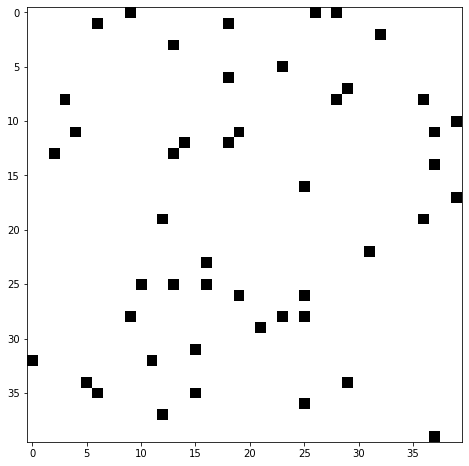

3
3
3
6
3
3
3
4
3
3


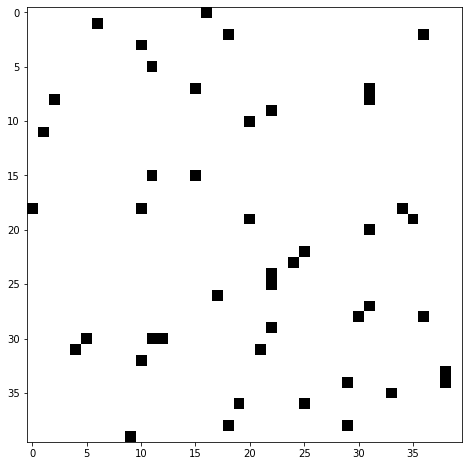

3
3
2
3
3
3
5
3
3
3


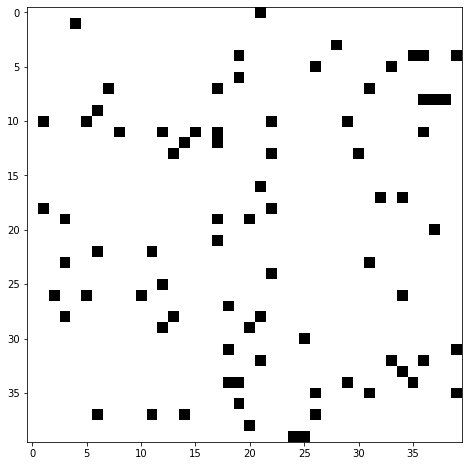

5
5
4
3
22
5
3
4
6
13


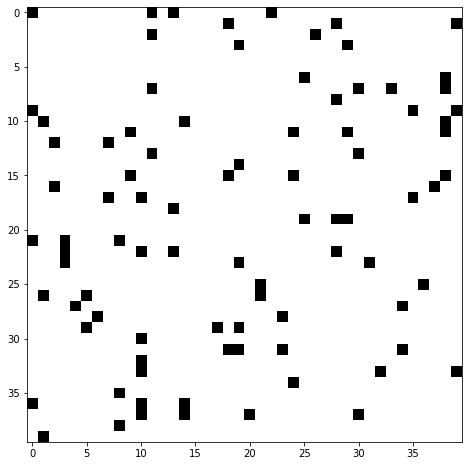

162
5
6
6
7
11
5
9
12
12


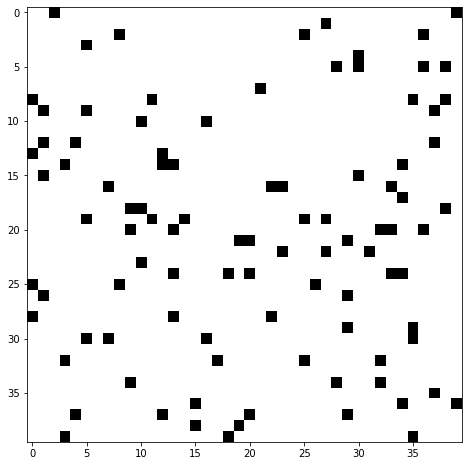

3
269
18
34
5
17
969
33
115
7


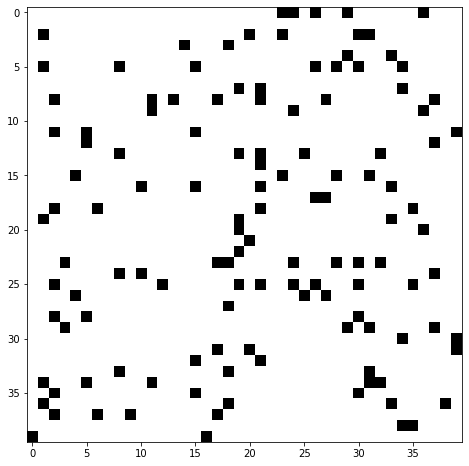

23
7
6
14
380
6
208
7
11
670


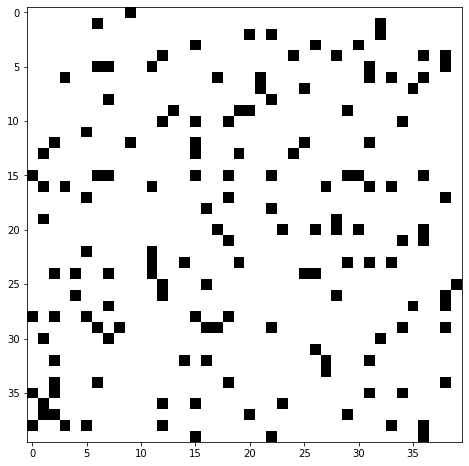

85
1372
402
68
223
409
46
1061
780
144


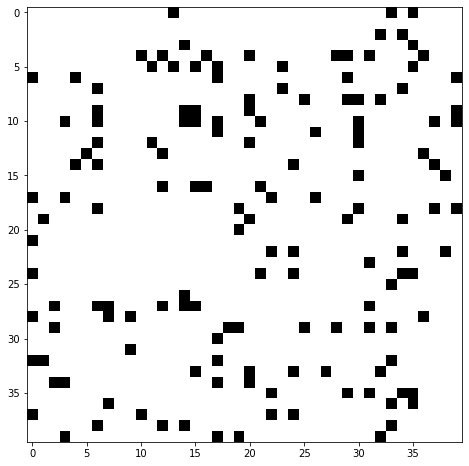

52
2007
14
547
134
517
188
292
1798
456


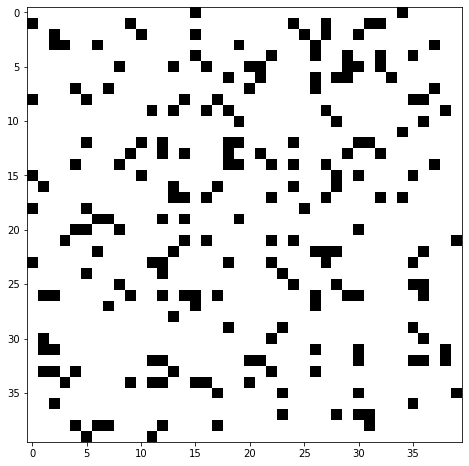

571
333
445
804
45
711
242
169
896
1583


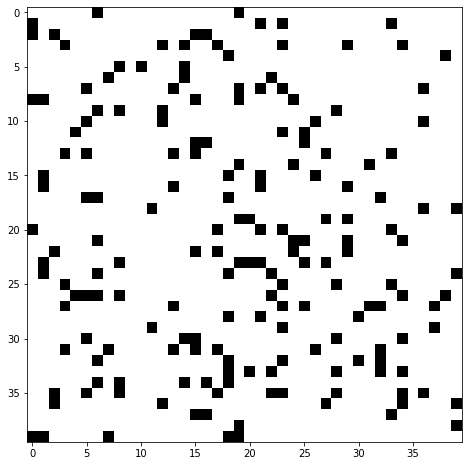

143
204
873
48
681
242
339
1248
981
1254


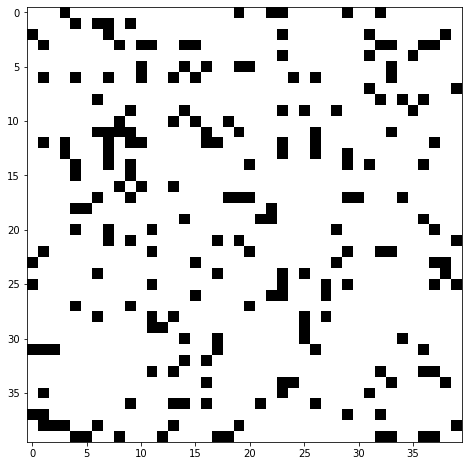

531
1005
255
145
863
24
1513
489
416
120


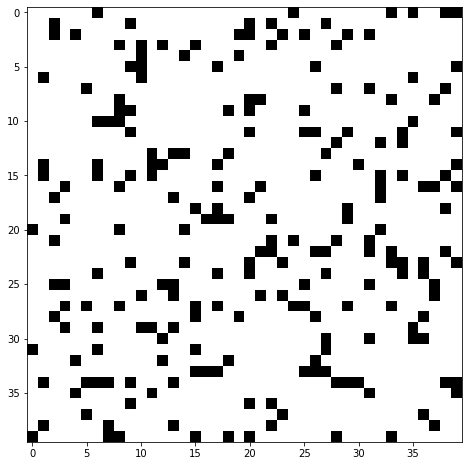

644
204
1769
539
340
1428
666
73
806
492


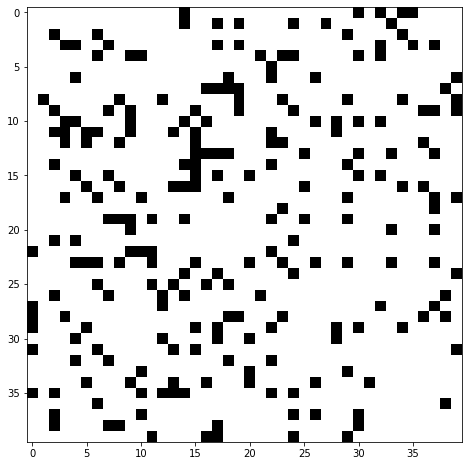

328
369
503
79
160
103
382
1112
806
587


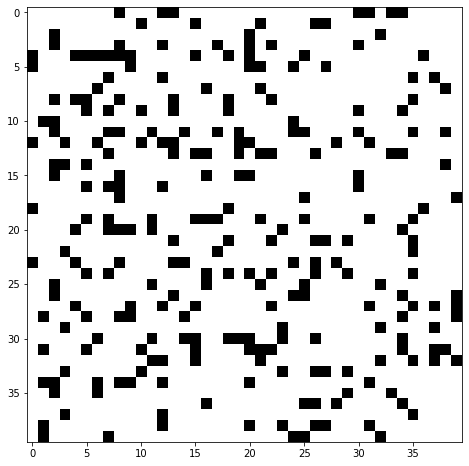

514
1226
899
1344
506
391
1355
472
636
1190


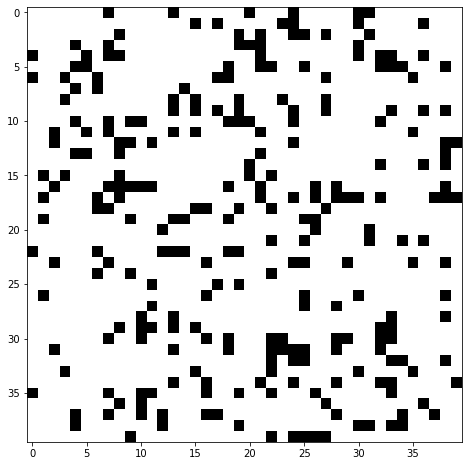

188
421
161
107
192
502
113
638
216
379


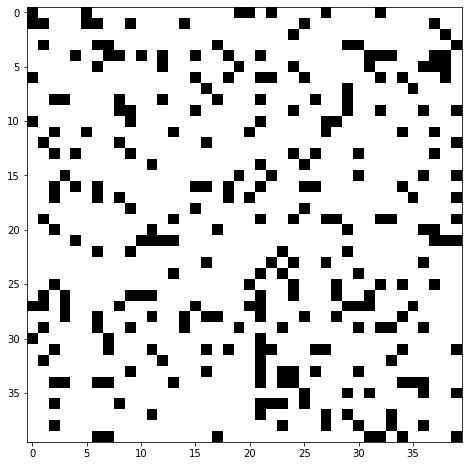

1106
3648
709
1054
744
196
544
323
734
1162


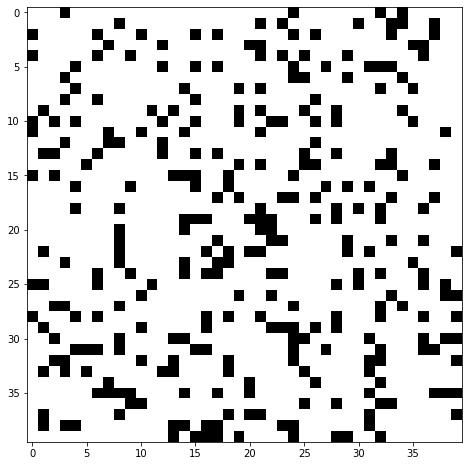

245
1489
1067
168
95
512
240
489
1111
212


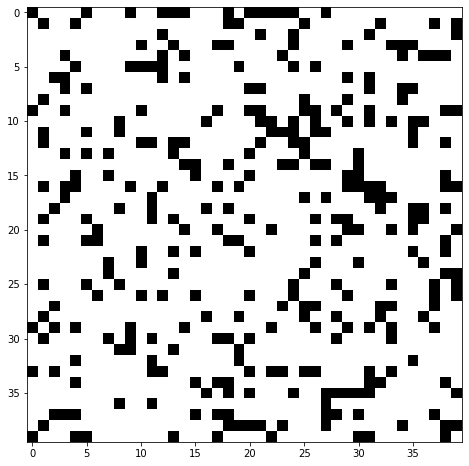

462
96
414
1092
359
804
480
936
908
1244


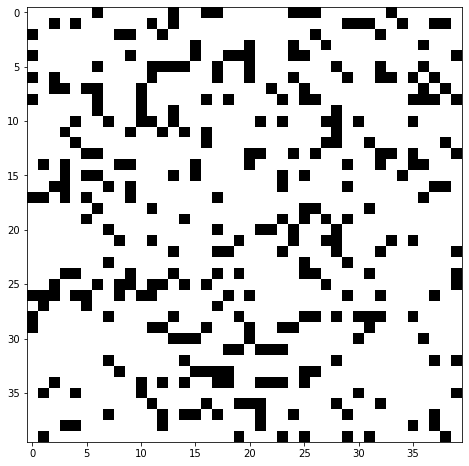

692
1672
750
365
998
405
1307
872
601
947


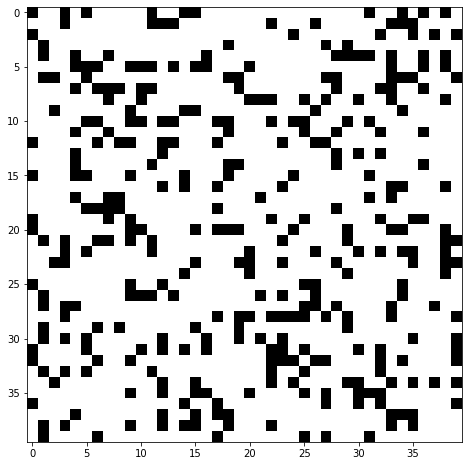

140
165
974
119
1683
471
403
297
308
508


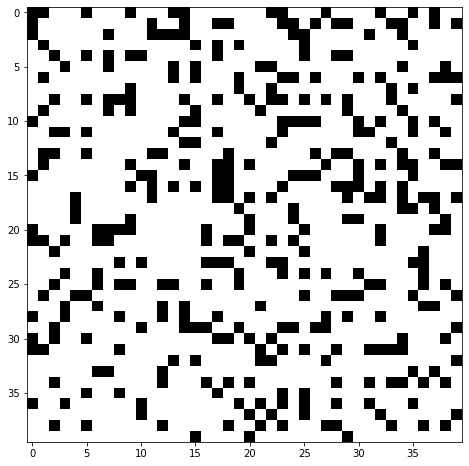

527
241
972
542
936
992
491
414
939
488


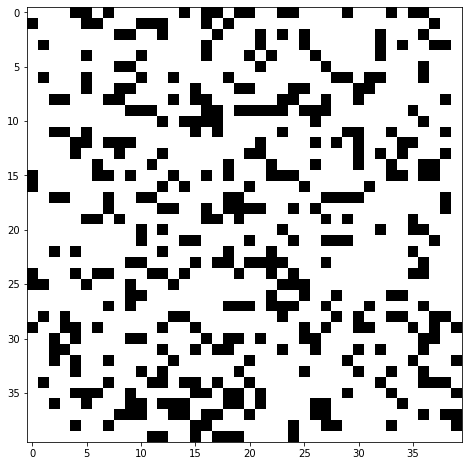

182
2090
341
800
968
551
493
192
260
354


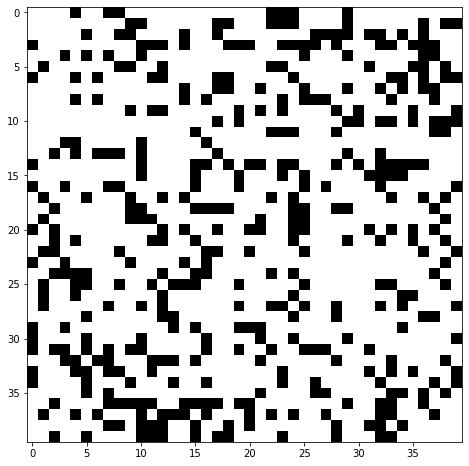

1291
1304
241
1590
156
471
618
526
452
471


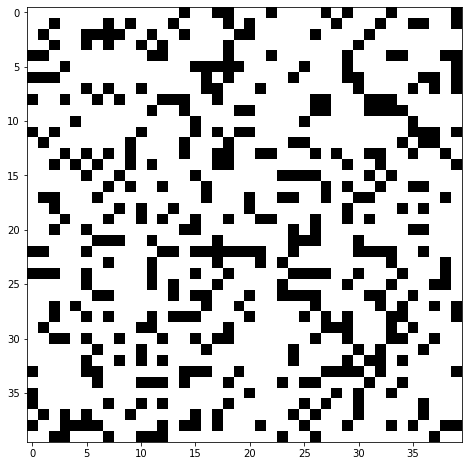

298
166
308
288
411
259
749
269
555
726


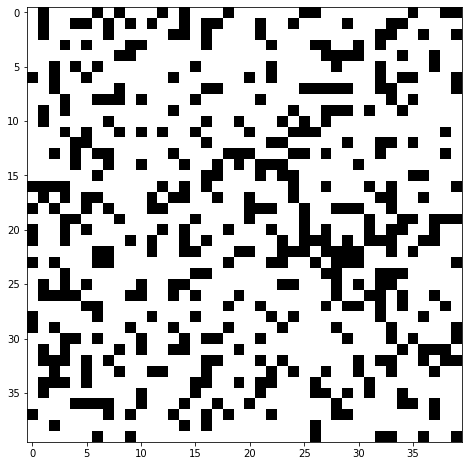

593
1049
778
279
898
285
362
279
410
370


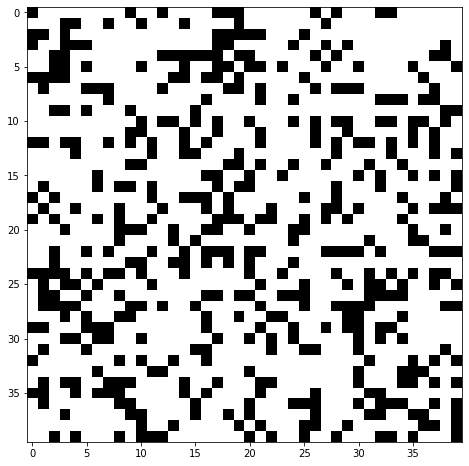

329
466
175
347
1050
744
456
569
596
505


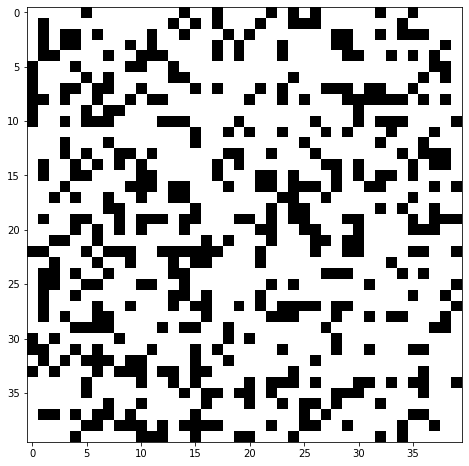

809
607
382
747
387
164
771
295
191
472


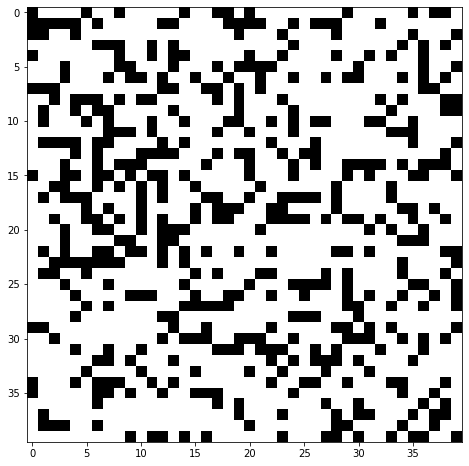

844
578
190
228
440
218
206
920
656
352


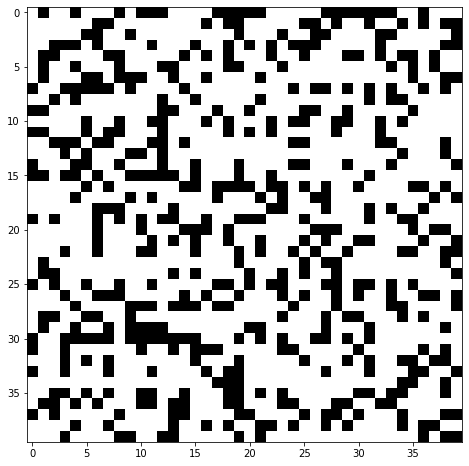

527
507
134
400
397
834
462
253
564
562


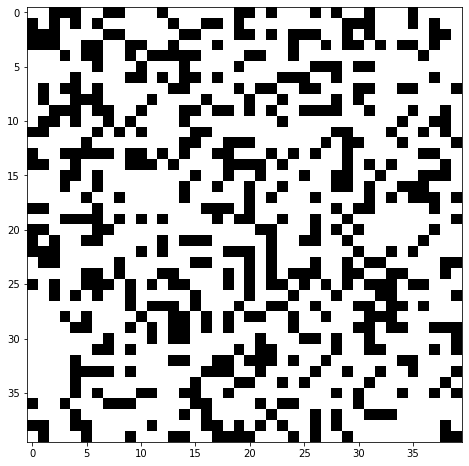

207
505
494
187
507
490
542
515
1003
1065


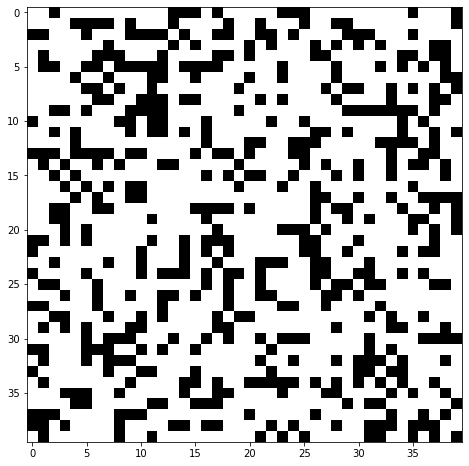

803
416
668
328
592
867
1015
827
454
795


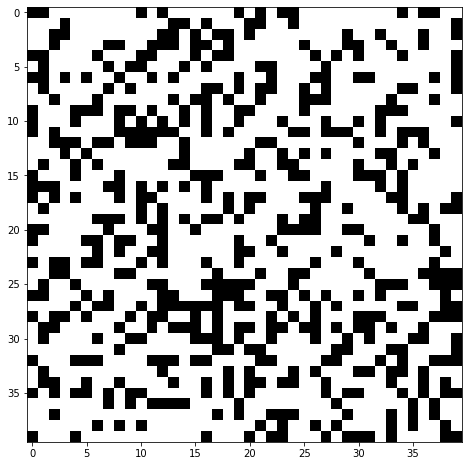

926
394
1522
833
1374
177
285
1917
504
1053


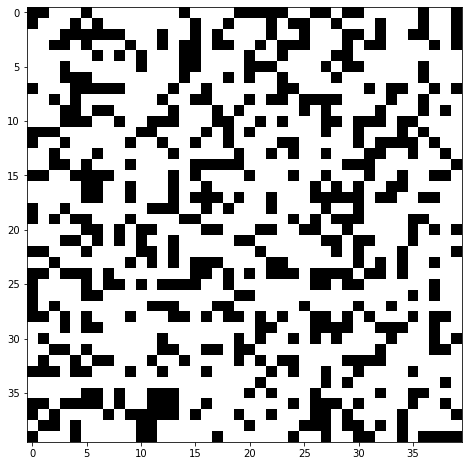

488
183
205
675
210
680
367
1140
361
967


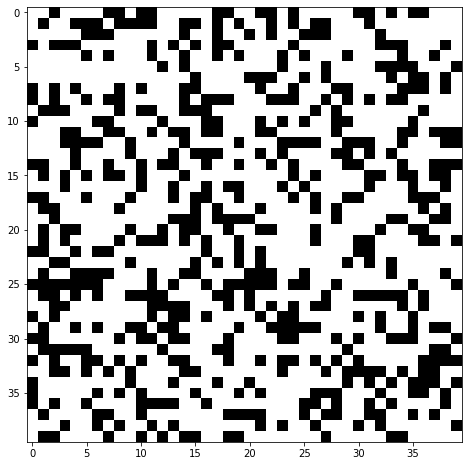

2198
656
455
379
894
629
1634
306
297
466


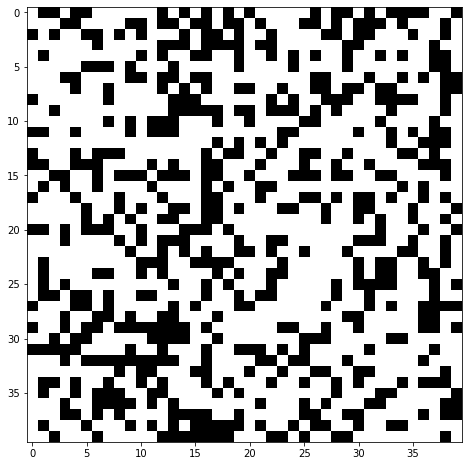

138
1372
551
1976
1082
478
374
364
343
511


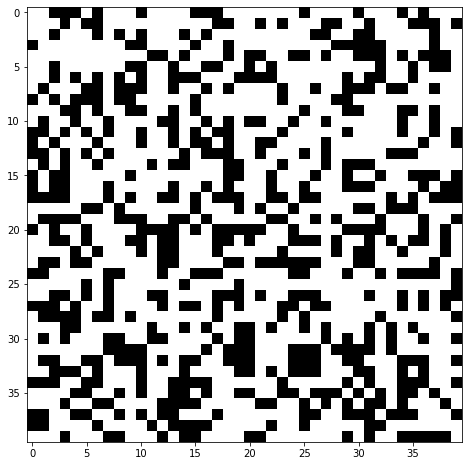

452
729
232
2049
455
592
750
1232
649
793


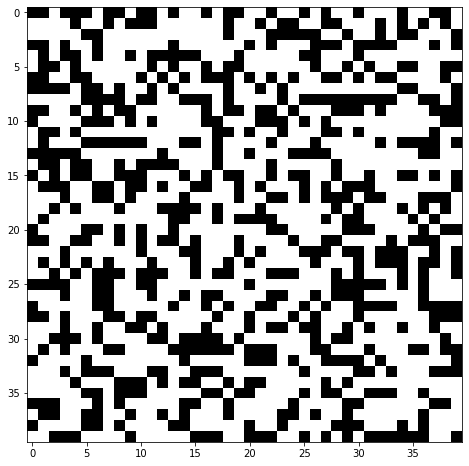

171
1280
221
981
762
129
375
1012
192
351


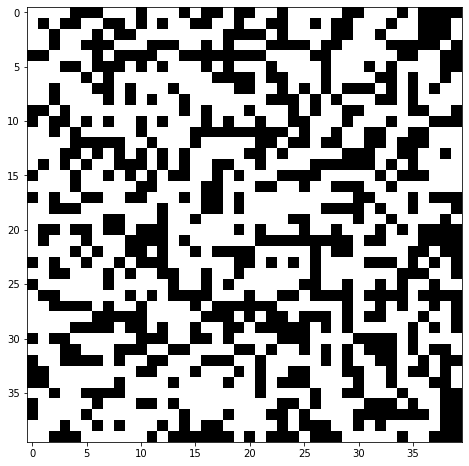

295
925
427
836
1057
310
636
862
335
865


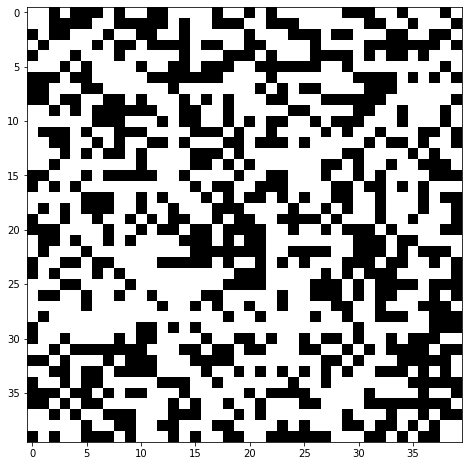

808
298
1633
635
508
240
643
630
536
1262


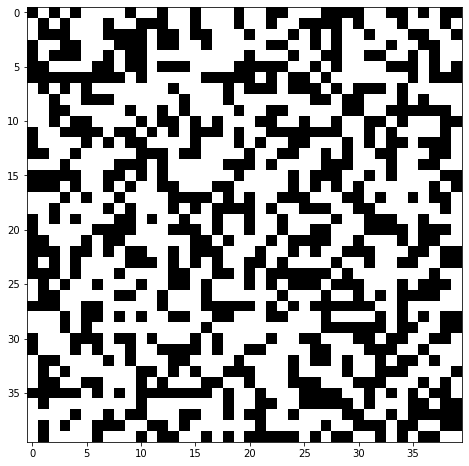

477
493
1699
693
148
654
877
665
287
2045


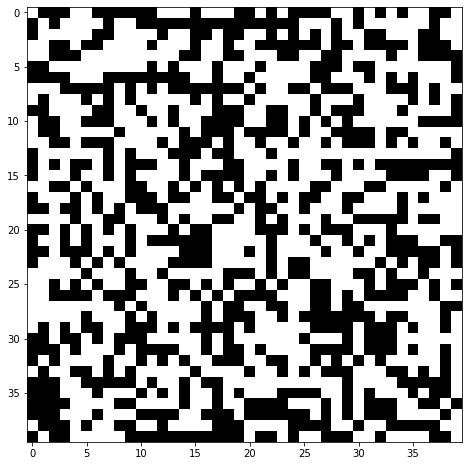

378
196
411
202
162
261
233
1214
244
388


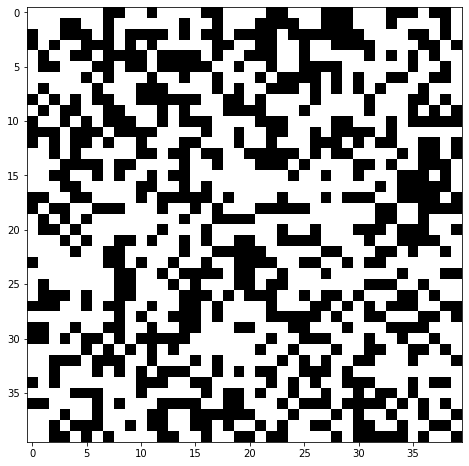

235
169
478
437
654
1056
846
433
1368
242


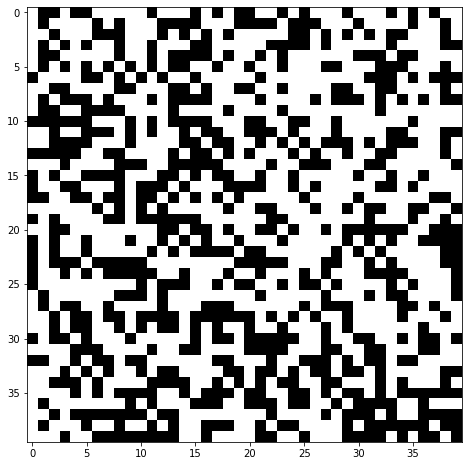

333
712
179
1658
615
110
592
404
460
320


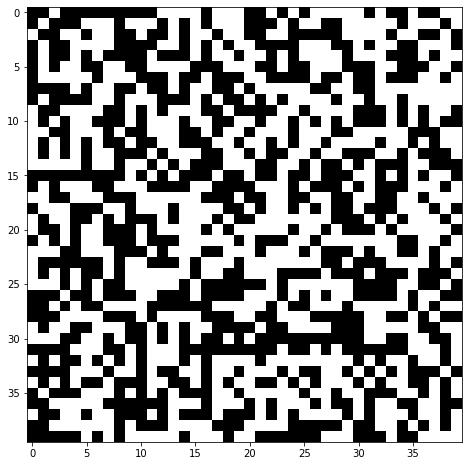

594
440
677
405
466
1811
318
363
301
250


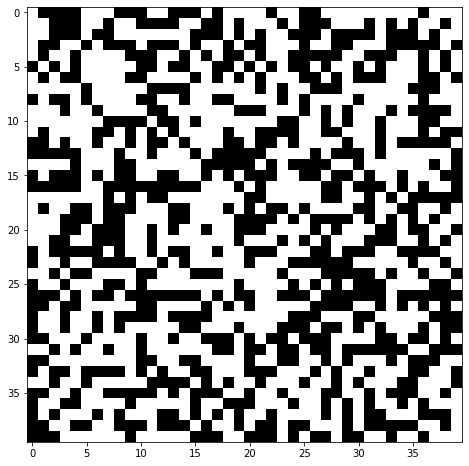

209
1086
1290
408
1414
1426
340
310
126
513


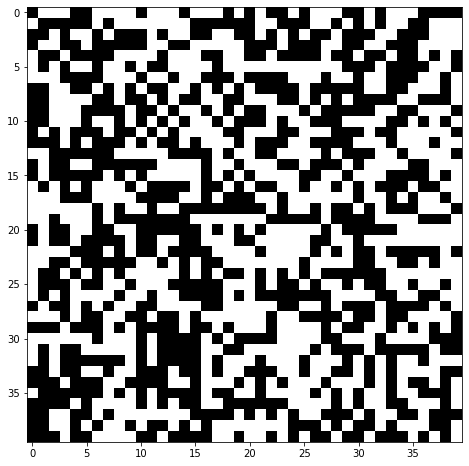

1115
1227
928
280
319
890
161
320
1623
473


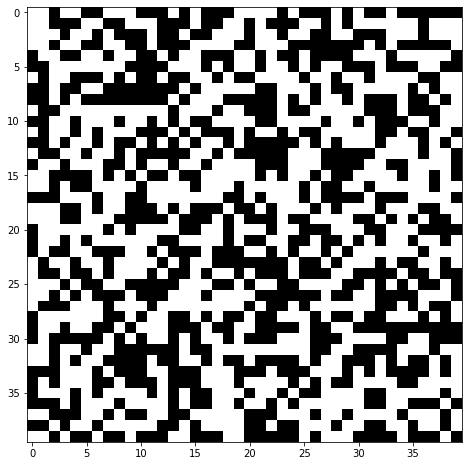

2659
323
700
150
193
385
894
1147
603
1747


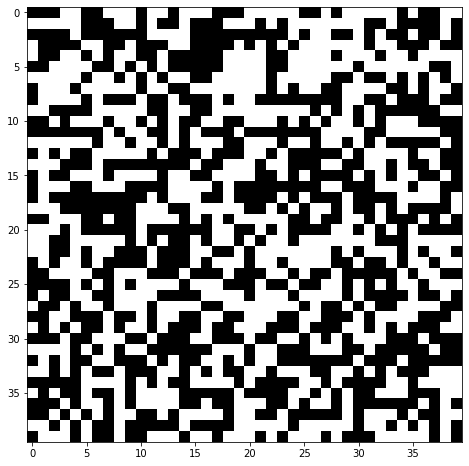

252
153
175
683
1175
423
117
354
375
405


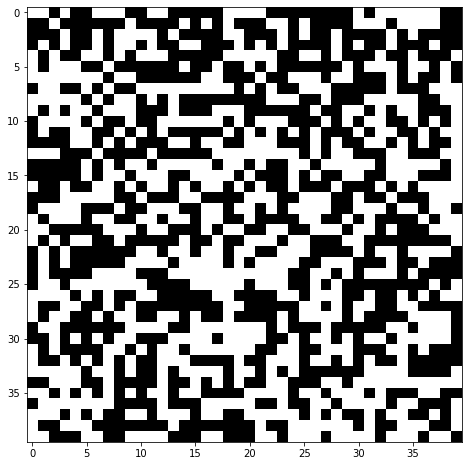

846
166
150
2023
661
1404
269
238
301
259


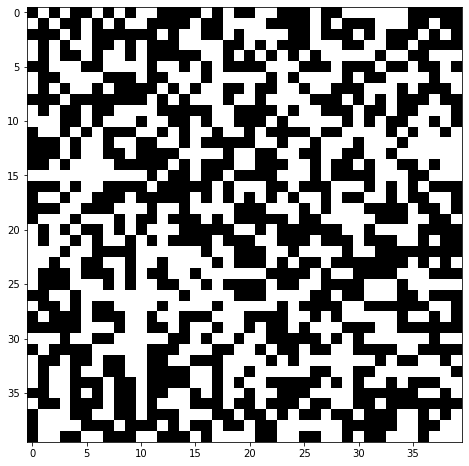

412
193
253
190
455
432
330
267
1252
495


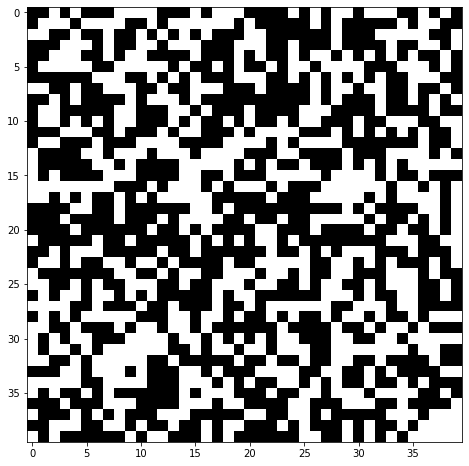

236
237
755
2109
786
2177
1086
188
454
760


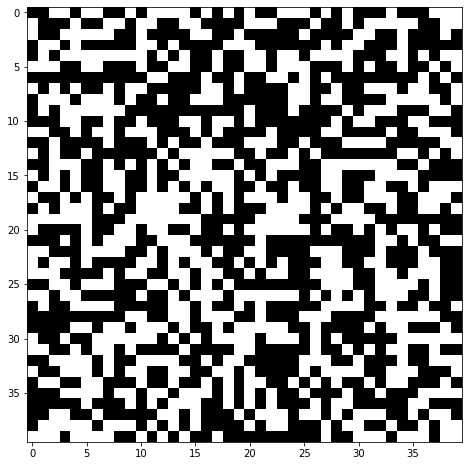

1303
1261
353
102
1331
646
754
390
146
553


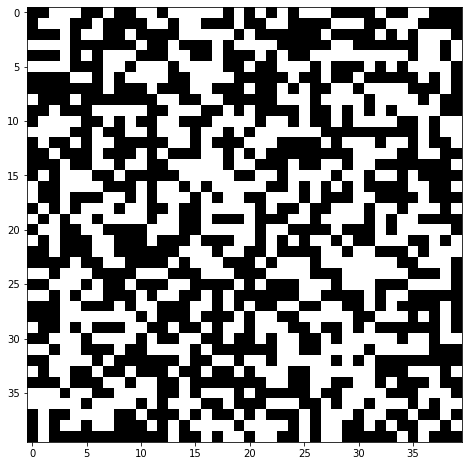

412
456
1282
178
362
383
194
134
350
192


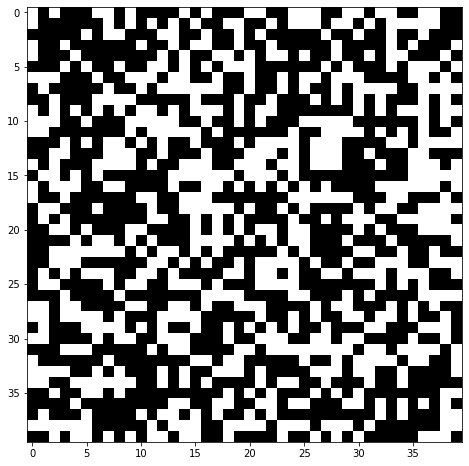

458
529
851
2231
290
1438
482
376
596
196


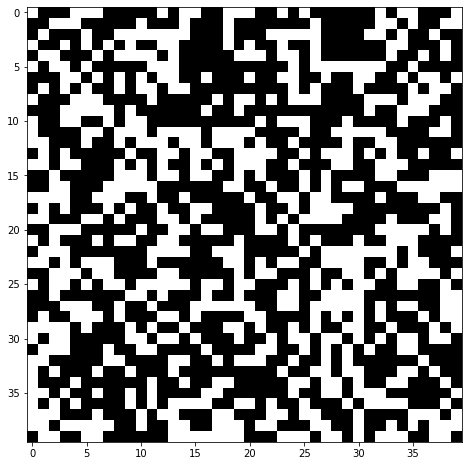

632
554
457
918
752
501
322
319
112
231


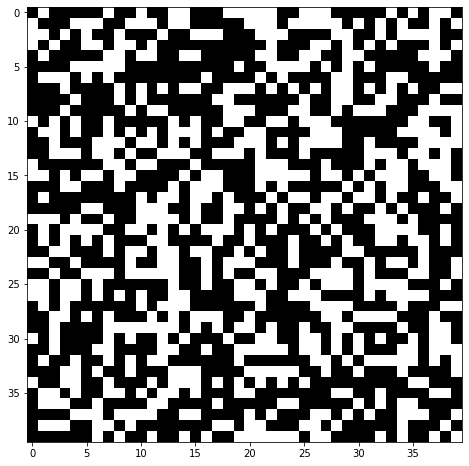

1485
209
1052
623
500
110
75
1284
201
210


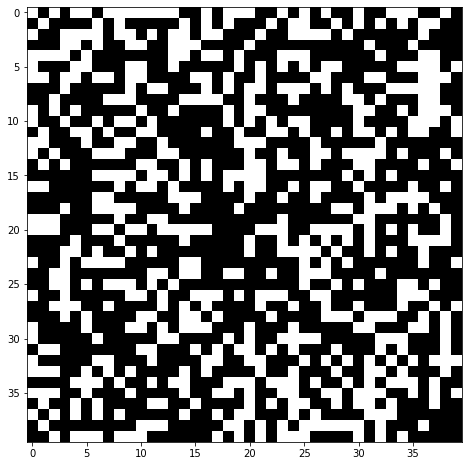

188
325
252
811
962
945
1034
963
203
502


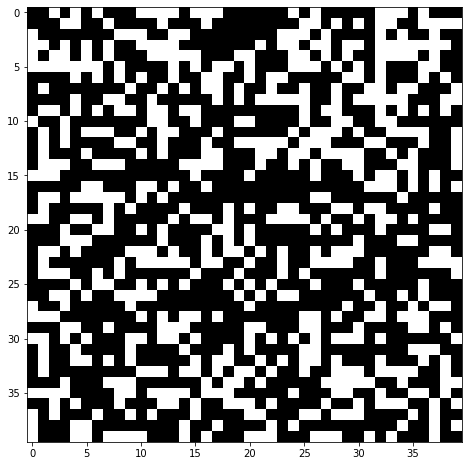

264
653
519
668
1233
967
318
553
337
752


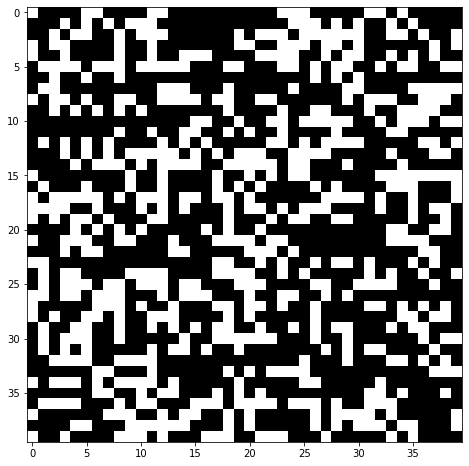

59
435
229
1458
217
981
856
712
396
1847


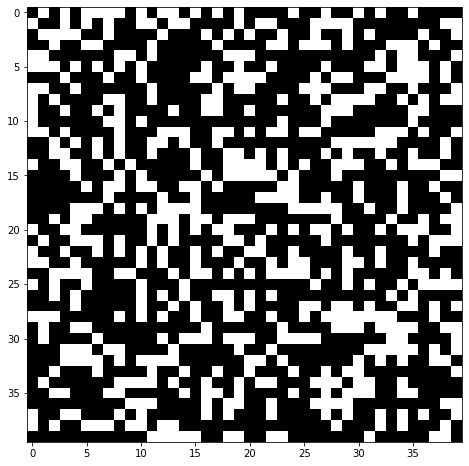

818
216
1560
784
146
488
228
308
112
180


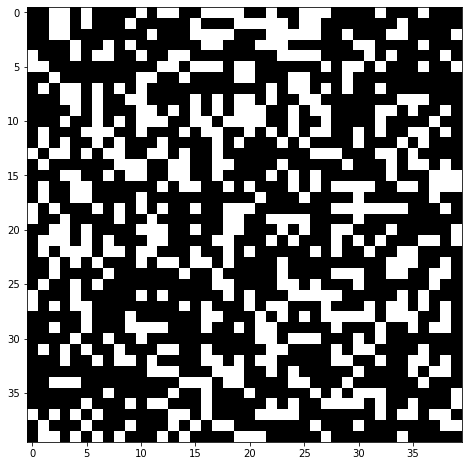

135
182
805
986
704
322
165
291
1110
281


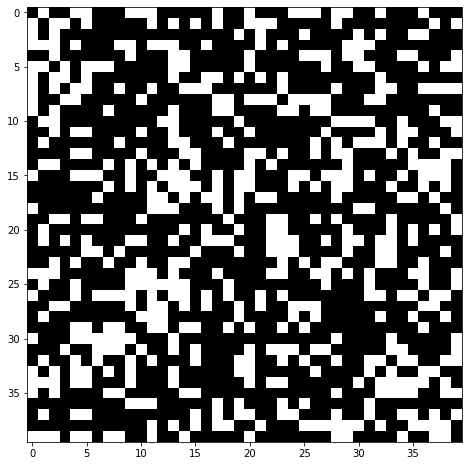

478
1017
429
356
378
653
172
399
694
420


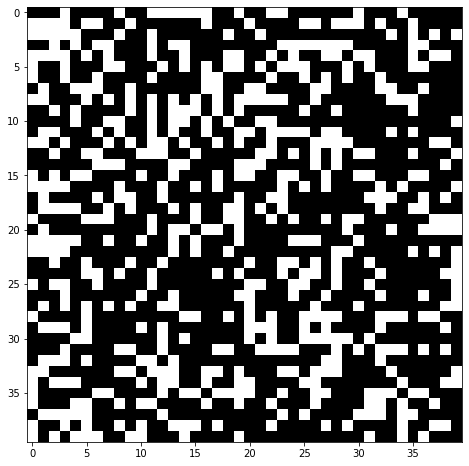

567
2367
462
103
983
383
153
83
187
483


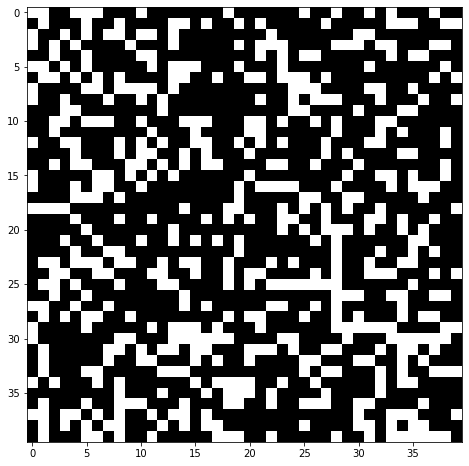

392
237
293
523
1672
913
787
290
149
235


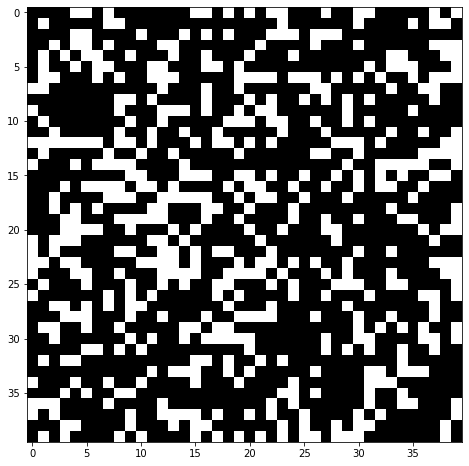

590
1148
1434
1413
467
432
120
1101
89
763


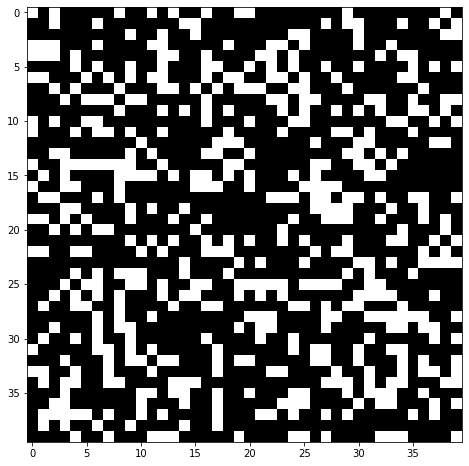

1715
288
620
455
1055
546
290
154
709
441


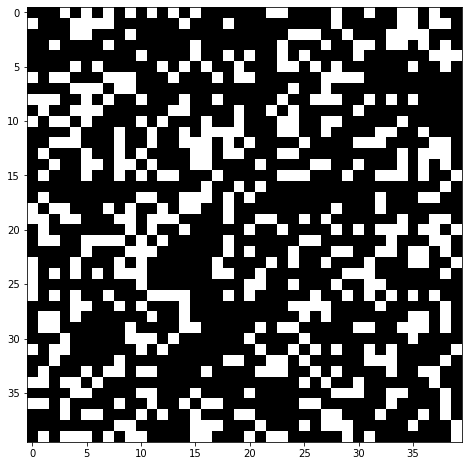

168
534
68
109
871
294
11
741
772
689


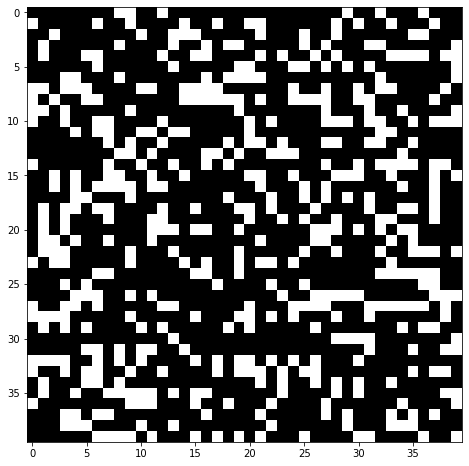

446
223
220
287
14
397
140
236
126
28


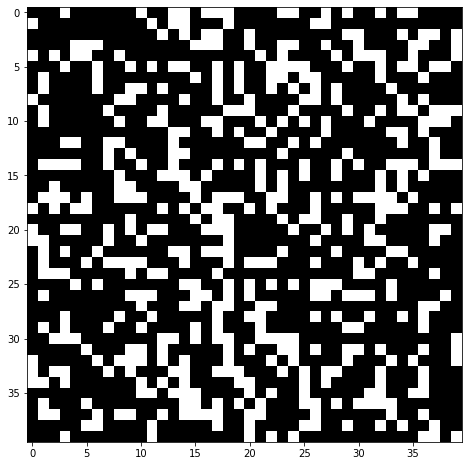

263
11
165
42
656
146
10
2211
19
120


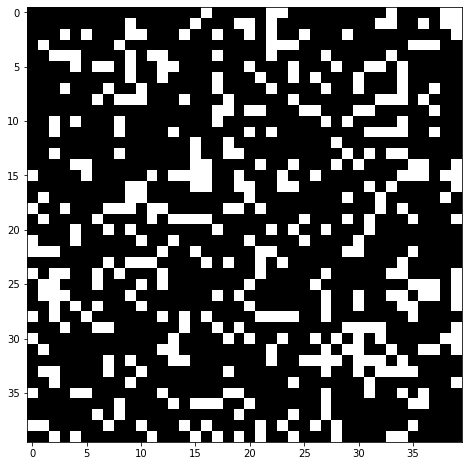

748
14
23
1319
15
17
39
21
5
27


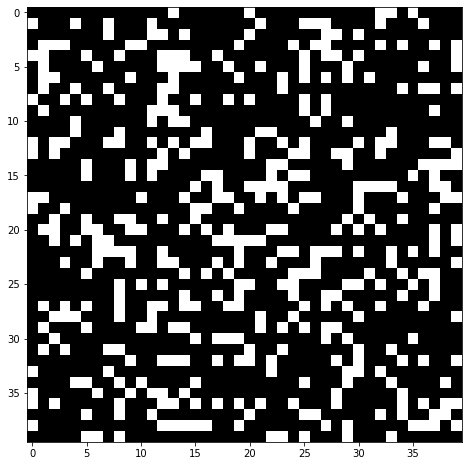

975
12
795
702
9
200
311
35
17
65


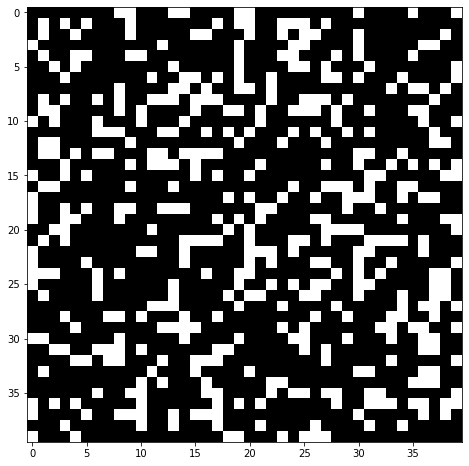

8
7
298
204
171
7
557
8
6
414


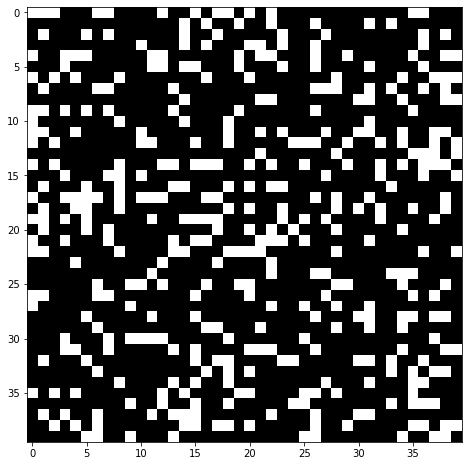

457
7
203
16
172
260
14
8
669
14


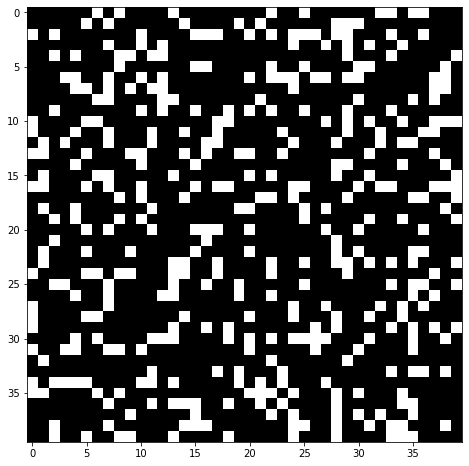

128
5
390
12
8
5
8
7
1993
4


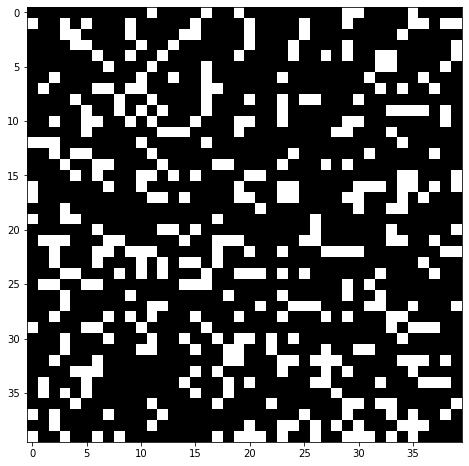

5
4
4
7
5
21
615
7
6
117


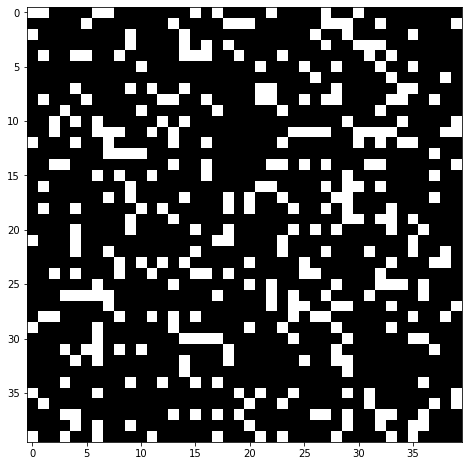

4
4
4
7
4
14
11
666
223
5


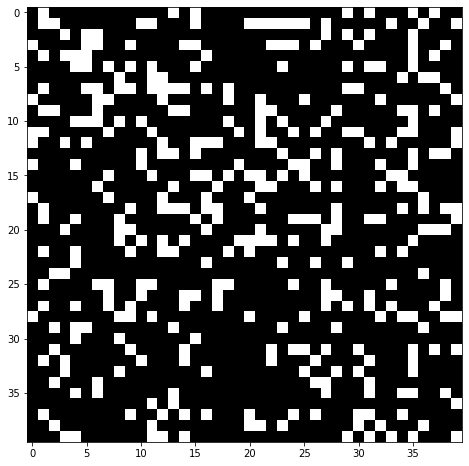

7
15
667
754
3
8
6
6
4
4


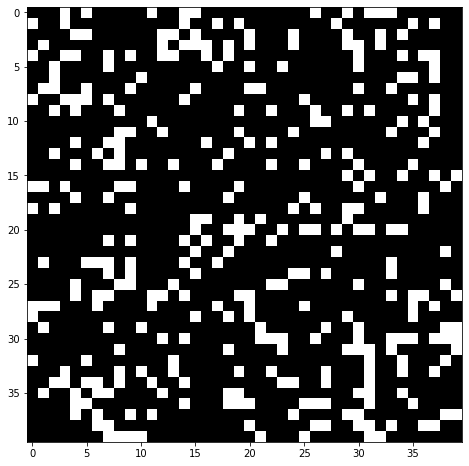

6
3
5
7
3
8
4
162
5
4


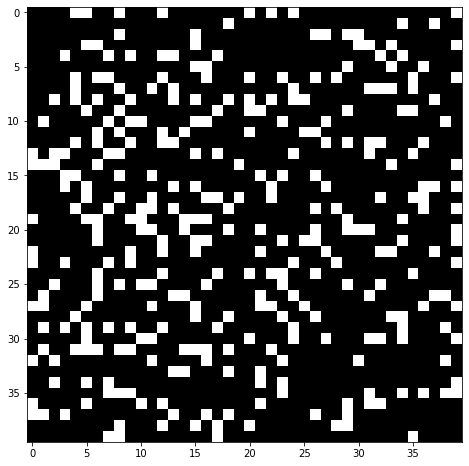

3
7
5
3
3
4
7
5
4
4


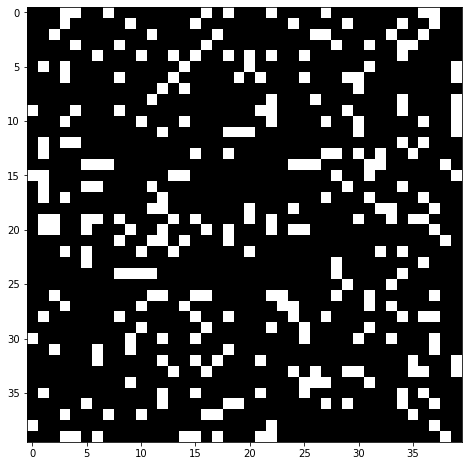

3
3
3
4
3
106
3
3
4
7


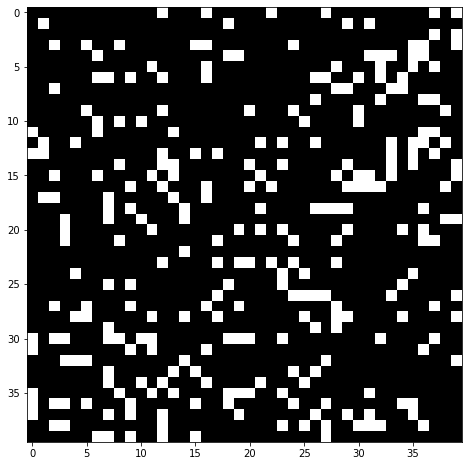

8
4
5
3
11
13
3
4
4
5


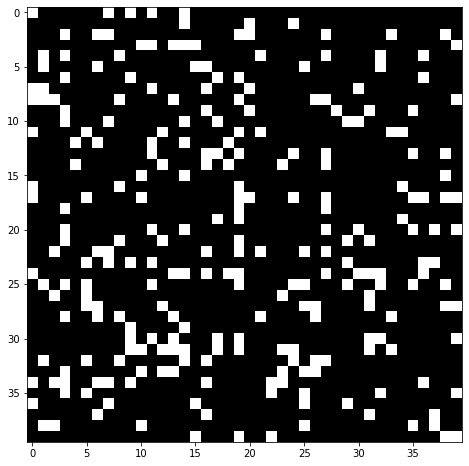

3
3
3
3
3
4
3
3
3
3


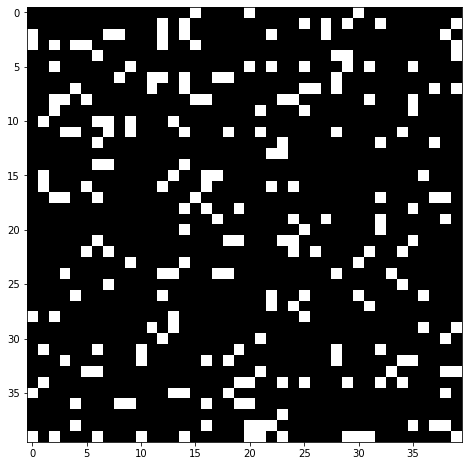

3
3
3
3
3
3
3
3
3
2


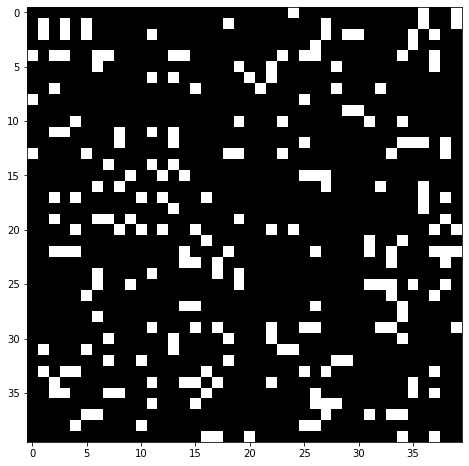

3
3
3
3
3
3
3
3
3
3


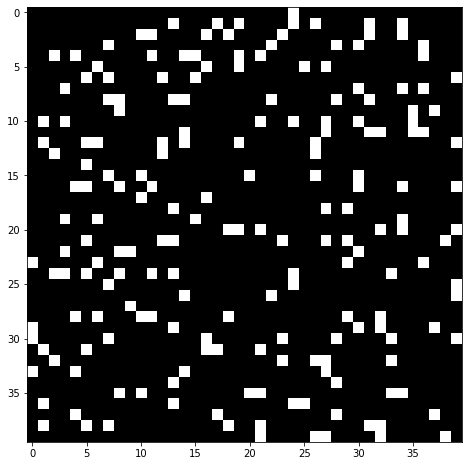

3
3
3
2
3
3
3
3
3
3


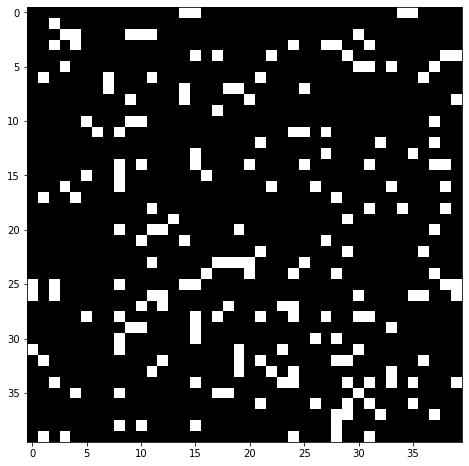

2
2
3
3
2
3
2
3
3
2


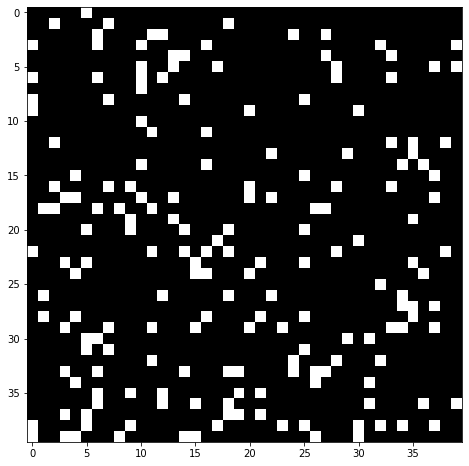

3
2
2
3
2
2
3
3
3
2


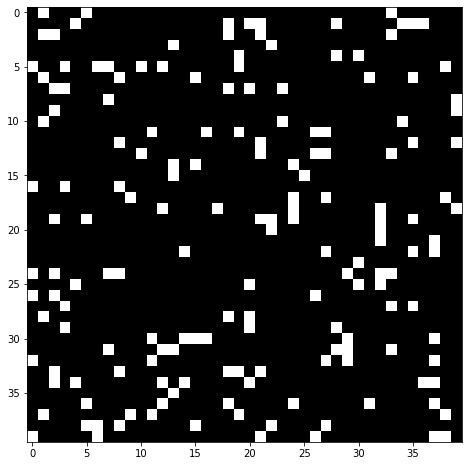

2
2
3
2
2
3
2
2
2
2


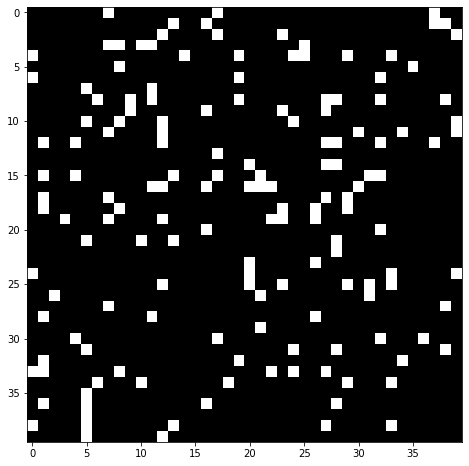

2
2
2
3
2
2
2
2
3
3


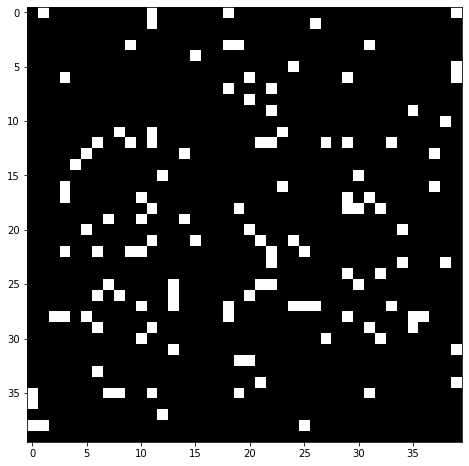

2
2
2
3
2
2
3
2
2
2


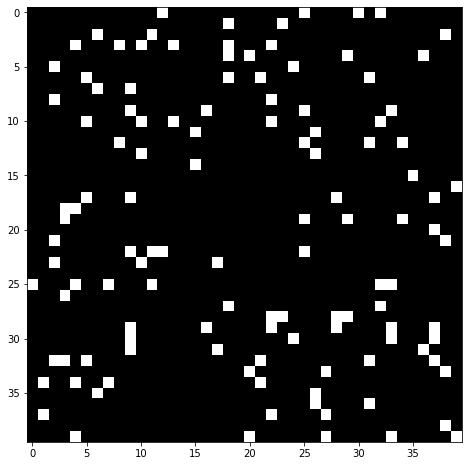

2
2
2
2
2
2
2
2
2
3


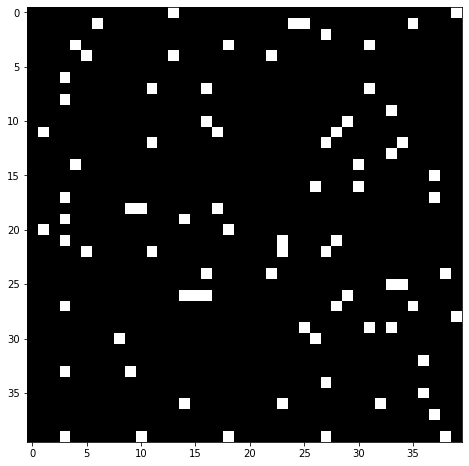

2
2
2
2
2
3
2
2
2
2


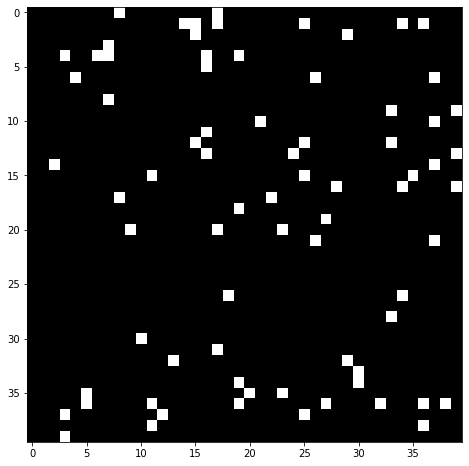

2
2
2
2
2
2
2
2
2
2


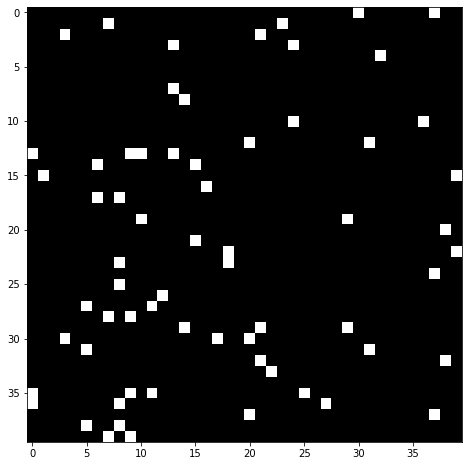

2
2
2
2
2
2
2
2
2
2


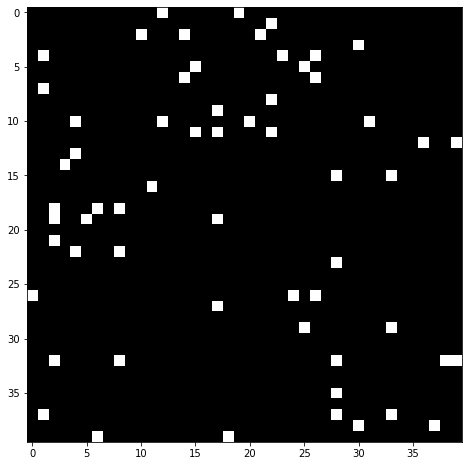

2
2
2
2
2
2
2
2
2
2


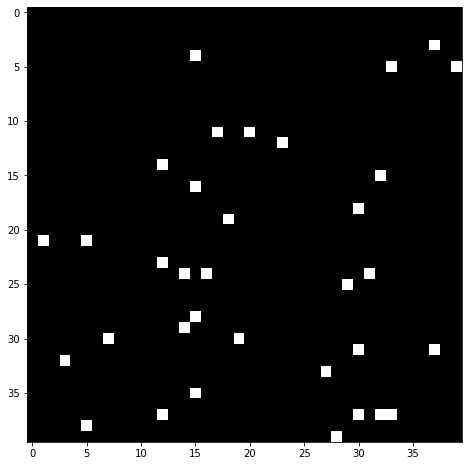

2
2
2
2
2
2
2
2
2
2


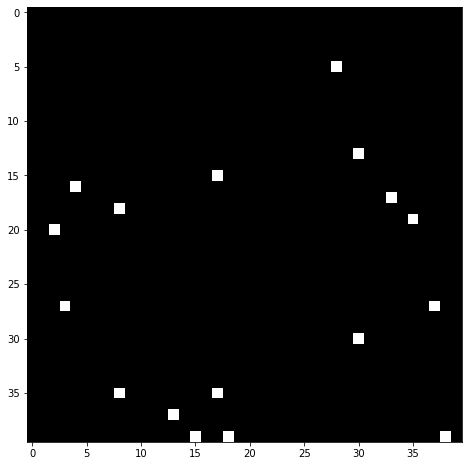

2
2
2
2
2
2
2
2
2
2


In [47]:
size = 40
num_filling = 99
num_average = 10
init_filling_factors = np.arange(1, num_filling+1) / (num_filling+1)
generations = np.zeros((num_filling, num_average))
max_generations = 4000

# Function to check stagnancy
def is_stagnant(grid, history):
    for prev_grid in history:
        if np.array_equal(grid, prev_grid):
            return True
    return False

# collect lots of data
for i in range(num_filling):
    init_filling_factor = init_filling_factors[i]
    for j in range(num_average):
        np.random.seed(1000+int(100*i)+j)
        grid = random_grid(size, init_filling_factor)
        if j == 0:
            fig, ax = plt.subplots(figsize=(8, 8))
            img = ax.imshow(grid, interpolation='none', cmap='binary')
            plt.show()
        
        histories = []
        for k in range(max_generations):
            next_grid = update_grid(grid)
            if is_stagnant(grid, histories):
                break
            histories.append(grid.copy())
            grid[:] = next_grid
        print(k)
        generations[i][j] = k

    

In [49]:
np.savetxt('generation.csv', generations, delimiter=",")

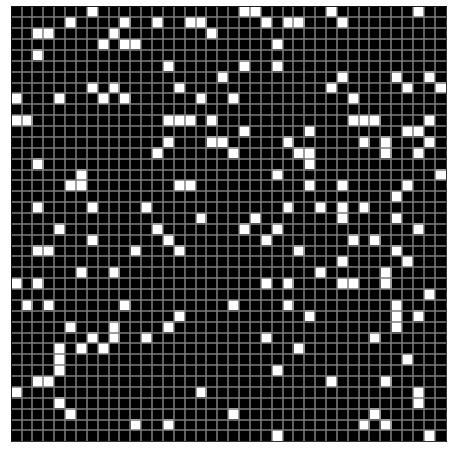

In [52]:
# plot displaying drastically different filling fractions 

# Set the grid size and create the initial grid
grid = random_grid(size, filling_factor=0.9)

# Create the figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 8))
img = ax.imshow(grid, interpolation='none', cmap='binary')

# Hide tick labels and tick marks on the X-axis
ax.set_xticks([])
ax.set_yticks([])
for i in range(size):
    ax.axvline(x=i-0.5, color=tableau_colors[7], linestyle='-')
    ax.axhline(y=i-0.5, color=tableau_colors[7], linestyle='-')
plt.gcf().set_facecolor('white')

# plt.savefig('./animations/filling_high.png')
plt.show()


In [53]:
generations

array([[2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00],
       [2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 3.000e+00],
       [3.000e+00, 3.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 4.000e+00, 3.000e+00, 3.000e+00],
       [3.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        5.000e+00, 3.000e+00, 3.000e+00, 3.000e+00],
       [5.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 2.200e+01, 5.000e+00,
        3.000e+00, 4.000e+00, 6.000e+00, 1.300e+01],
       [1.620e+02, 5.000e+00, 6.000e+00, 6.000e+00, 7.000e+00, 1.100e+01,
        5.000e+00, 9.000e+00, 1.200e+01, 1.200e+01],
       [3.000e+00, 2.690e+02, 1.800e+01, 3.400e+01, 5.000e+00, 1.700e+01,
        9.690e+02, 3.300e+01, 1.150e+02, 7.000e+00],
       [2.300e+01, 7.000e+00, 6.000e+00, 1.400e+01, 3.800e+02, 6.000e+00,
        2.080e+02, 7.000e+00, 1.100e+

In [58]:
avg_generations = np.mean(generations, axis=1)
avg_generations

array([   2. ,    2.6,    3.4,    3.1,    7. ,   23.5,  147. ,  133.2,
        459. ,  600.5,  579.9,  601.3,  536.1,  696.1,  442.9,  853.3,
        291.7, 1022. ,  562.8,  679.5,  860.9,  506.8,  654.2,  623.1,
        712. ,  402.9,  530.3,  523.7,  482.5,  463.2,  464. ,  551.5,
        676.5,  898.5,  527.6,  791.4,  718.9,  793.3,  547.4,  654.8,
        719.3,  803.8,  368.9,  591.8,  538.3,  562.5,  712.2,  733.6,
        880.1,  411.2,  631.7,  427.9,  878.8,  683.9,  394.3,  744.7,
        479.8,  574.9,  618.5,  626.4,  719. ,  484. ,  498.1,  499.6,
        577.1,  549.1,  755.7,  627.3,  425.7,  211.7,  364.3,  222.8,
        312.1,  168. ,  182. ,  256. ,   79.1,   94.2,  147.4,   20.7,
          4.5,   13.9,    6. ,    3.1,    2.9,    3. ,    2.9,    2.5,
          2.5,    2.2,    2.3,    2.2,    2.1,    2.1,    2. ,    2. ,
          2. ,    2. ,    2. ])

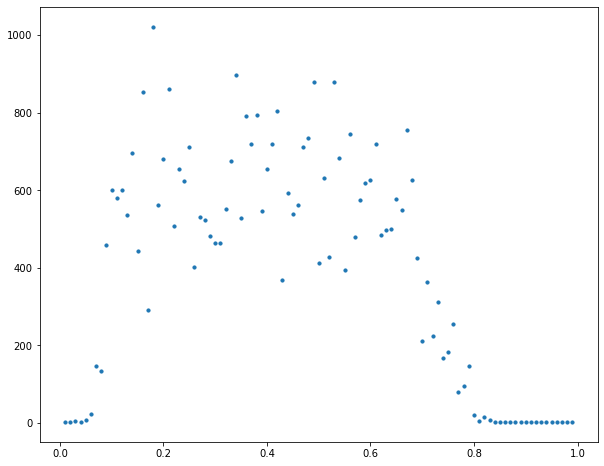

In [59]:
# plotting longevity against filling factors
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

# Create a side-by-side bar chart
ax.scatter(init_filling_factors, avg_generations, \
            marker='o', color=tableau_colors[0], s=10, \
            alpha=1, label='Data Points')

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_ylim(0, 750)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Digit', fontdict=font)
plt.ylabel('Frequency', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Histogram of the Third Digit', fontproperties=suptitle_font, y=0.93)
plt.xticks(x, categories)
# plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('./plots/generation_vs_filling.png')
plt.show()

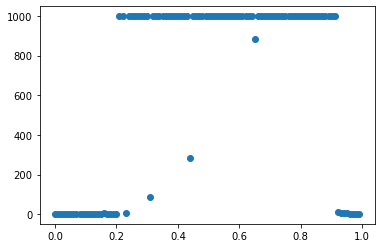

In [99]:
plt.scatter(init_filling_factors, total_iterations, )